# Aprendizado Não-Supervisionado - Clusterização com K-Means

## 1.0 Loading dataset

In [47]:
from sklearn import datasets as ds
from matplotlib import pyplot as plt
from sklearn import cluster as ct
from sklearn import metrics as mt
import numpy as np

## 2.0 Training model

In [63]:
X, y = ds.make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.9,
    random_state=0
)

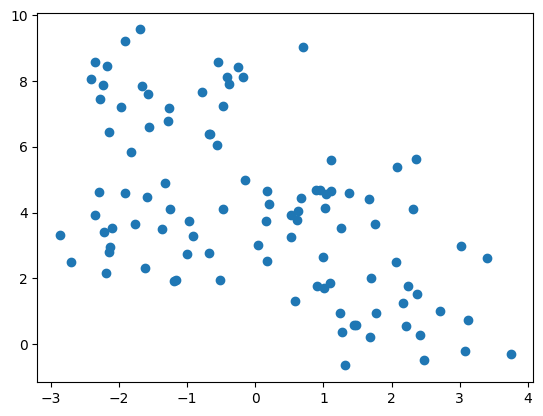

In [64]:
plt.scatter( X[:,0], X[:, 1])#, c=y)

In [65]:
n_clusters = 4

# define
kmeans = ct.KMeans(
    n_clusters=n_clusters,
    init="random",
    n_init=10,
    random_state=0
)

# fit (training)
labels = kmeans.fit_predict(X)

In [66]:
# performance (test)
silhouette_avg = mt.silhouette_score(X, labels)

print(f"Para n_clusters = {n_clusters} a silhouette_avg = {silhouette_avg}.")

Para n_clusters = 4 a silhouette_avg = 0.5186419461291238.


## 3.0 Fine tunning

In [67]:
n_clusters = np.arange(2, 11, 1)
silhouette_list = []

for c in n_clusters:

    # define
    kmeans = ct.KMeans(
        n_clusters=c,
        init="random",
        n_init=10,
        random_state=0
    )

    # fit (training)
    labels = kmeans.fit_predict(X)

    # performance (test)
    silhouette_avg = mt.silhouette_score(X, labels)
    silhouette_list.append(silhouette_avg)

    print(f"Para n_clusters = {c} a silhouette_avg = {silhouette_avg}.")

Para n_clusters = 2 a silhouette_avg = 0.4547714125843897.
Para n_clusters = 3 a silhouette_avg = 0.4855124188496825.
Para n_clusters = 4 a silhouette_avg = 0.5186419461291238.
Para n_clusters = 5 a silhouette_avg = 0.4425780929422603.
Para n_clusters = 6 a silhouette_avg = 0.3917742986436372.
Para n_clusters = 7 a silhouette_avg = 0.3701217862078145.
Para n_clusters = 8 a silhouette_avg = 0.39883688902113845.
Para n_clusters = 9 a silhouette_avg = 0.3668617392907547.
Para n_clusters = 10 a silhouette_avg = 0.3755388542326831.


Text(0, 0.5, 'Silhouette Score Average')

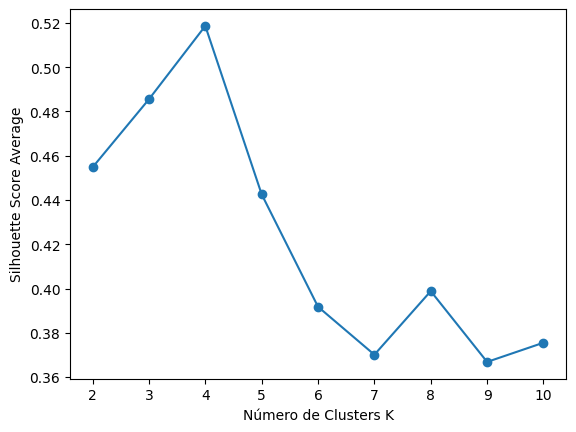

In [68]:
plt.plot(n_clusters, silhouette_list, marker="o")
plt.xlabel("Número de Clusters K")
plt.ylabel("Silhouette Score Average")

## 4.0 Algoritmo em produção

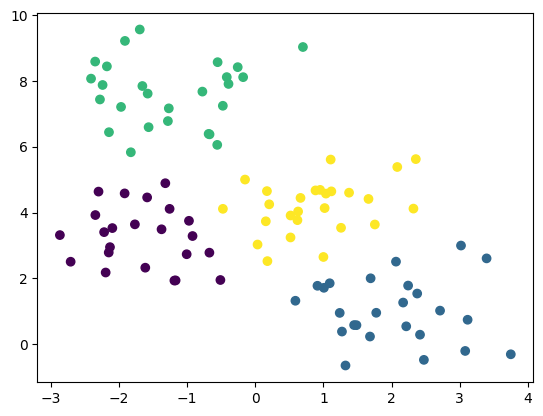

In [69]:
# define
c = 4
kmeans = ct.KMeans(
    n_clusters=c,
    init="random",
    n_init=10,
    random_state=0
)

# fit (training)
labels = kmeans.fit_predict(X)

silhouette_avg = mt.silhouette_score(X, labels)

plt.scatter( X[:, 0], X[:, 1], c=labels)